# Data Analytics

# About the csv files

### movies.csv Contains id, movie title, and tag information.

### ratings.csv contains the rating matrix. The rating matrix is a big matrix where rows represent users, columns represent movies and the values inside the matrix are rating values between 0.5-5 for a particular user-movie pair. The name of this dataset comes from this file

### tags.csv has user-generated tags, It will be used to create a tag cloud.
### links.csv is a mapping file that includes movielens identifiers and their corresponding TMDB identifiers. It will be used to fetch the posters using the tmdb API.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from IPython.display import Image, display
sns.set()

In [10]:
df_movie = pd.read_csv('movies.csv', index_col=0)
df_rating = pd.read_csv('ratings.csv')
df_rating = df_rating.drop(columns='timestamp')
    
nnz_count = df_rating.shape[0]
print(f'Rating count: {nnz_count}')
row_count = df_rating['userId'].nunique()
print(f'User count: {row_count}')
col_count = df_rating['movieId'].nunique()
print(f'Movie count: {col_count}')
density = nnz_count / (row_count * col_count)
print(f'Density of the Matrix: {density:.5f}')
user_group = df_rating.drop(columns='movieId').groupby('userId')
user_rating_count = user_group.count()['rating']
row_max = user_rating_count.max()
row_min = user_rating_count.min()
row_ave = user_rating_count.mean()

print(f'Max # movies rated by a user: {row_max}')
print(f'Min # movies rated by a user: {row_min}')
print(f'Average # movies rated by a user: {row_ave:.2f}')

movie_group = df_rating.drop(columns='userId').groupby('movieId')
movie_rating_count = movie_group.count()['rating']
col_max = movie_rating_count.max()
col_min = movie_rating_count.min()    
col_ave = movie_rating_count.mean()

print(f'Max # users rated a movie: {col_max}')
print(f'Min # users rated a movie: {col_min}')
print(f'Average # users rated a movie: {col_ave:.2f}')

Rating count: 25000095
User count: 162541
Movie count: 59047
Density of the Matrix: 0.00260
Max # movies rated by a user: 32202
Min # movies rated by a user: 20
Average # movies rated by a user: 153.81
Max # users rated a movie: 81491
Min # users rated a movie: 1
Average # users rated a movie: 423.39


### There is a person on the Earth, that watched 32202 movies and rated them on the Movielens platform. That  would probably take around 6-7 years.

### The movie rated most has over 80k ratings and that movie is Forrest Gump.

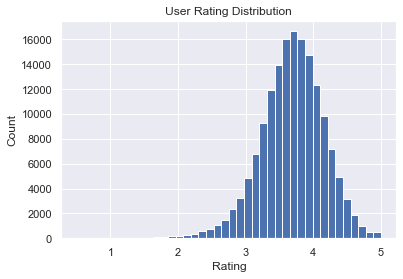

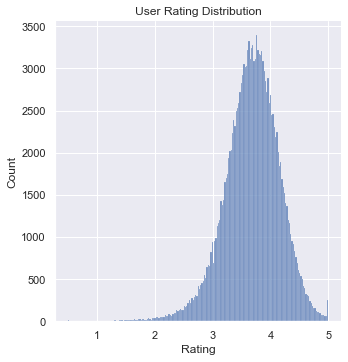

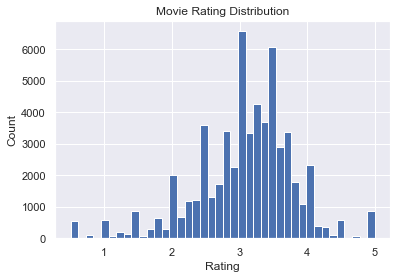

In [12]:
# Row Stats
user_group = df_rating.drop(columns='movieId').groupby('userId')
user_group['rating'].mean().hist(bins=40)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('User Rating Distribution')
plt.show()

sns.displot(user_group['rating'].mean())
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('User Rating Distribution')
plt.show()

movie_group = df_rating.drop(columns='userId').groupby('movieId')
movie_group['rating'].mean().hist(bins=40)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Movie Rating Distribution')
plt.show()

### Rating histograms show how high and low scores which are distributed among movies and users. It looks almost like a normal distribution.

### Movie ratings graph shows variations though

In [13]:
movie_rating = movie_group.agg(['count', 'mean'])
movie_rating.columns = movie_rating.columns.get_level_values(1)
movie_rating.head()
most_popular_movie_id = movie_rating['count'].idxmax()
print(df_movie.loc[most_popular_movie_id]['title'])
print(movie_rating.loc[most_popular_movie_id])

Forrest Gump (1994)
count    81491.000000
mean         4.048011
Name: 356, dtype: float64


# Most Rated Movie - Forrest Gump

In [14]:
movie_rating_filtered = movie_rating[movie_rating['count'] > 2000]

# Top 20 movies of the Database

In [16]:
df_link = pd.read_csv('links.csv', index_col=0, dtype={'imdbId': str})
df_link.head()
top_20 = movie_rating_filtered.sort_values(by='mean', ascending=False).head(n=20)
top_20['title'] = df_movie.loc[top_20.index.tolist()]['title']
top_20['imdbid'] = df_link.loc[top_20.index.tolist()]['imdbId']
top_20

,count,mean,title,imdbid
movieId,,,,
318,81482,4.413576,"Shawshank Redemption, The (1994)",0111161
858,52498,4.324336,"Godfather, The (1972)",0068646
50,55366,4.284353,"Usual Suspects, The (1995)",0114814
1221,34188,4.261759,"Godfather: Part II, The (1974)",0071562
2019,13367,4.254769,Seven Samurai (Shichinin no samurai) (1954),0047478
527,60411,4.247579,Schindler's List (1993),0108052
1203,16569,4.243014,12 Angry Men (1957),0050083
904,20162,4.237948,Rear Window (1954),0047396
2959,58773,4.228311,Fight Club (1999),0137523


# Creating a Word Cloud from the user's tags data. 

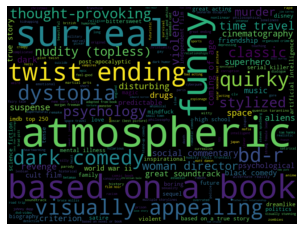

In [18]:
genres_unique = pd.DataFrame(df_movie['genres'].str.split('|').tolist()).stack().unique()

df_tag = pd.read_csv('tags.csv')

df_tag = df_tag[pd.notnull(df_tag['tag'])]

data = df_tag['tag'].apply(lambda x: x.lower())

tag2freq = data.groupby(data).count()

for genre in genres_unique:
    genre = genre.lower()
    if genre in tag2freq:
        tag2freq.pop(genre)

im = WordCloud(width=800, height=600).generate_from_frequencies(tag2freq)

plt.imshow(im, interpolation='bilinear')
plt.axis("off")
plt.show()